In [1]:
import sklearn.externals.joblib as joblib
import sklearn.metrics
import sklearn.externals.joblib as joblib
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA

from MulticoreTSNE import MulticoreTSNE as TSNE

In [2]:
data = pd.read_csv('../data/dataset.csv', header=None)

In [3]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,477,478,479,480,481,482,483,484,485,486
0,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.385031,0.60,0.40,0.565036,0.054403
1,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.695652,0.20,0.20,0.372974,0.030327
2,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.163088,1.00,1.00,0.979375,0.203325
3,pe-malicious,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.925532,0.25,0.25,0.648750,0.000407
4,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.220399,1.00,1.00,0.979375,0.203325


In [4]:
desc = data.describe()
desc

,1,2,3,4,5,6,7,8,9,10,...,477,478,479,480,481,482,483,484,485,486
count,199970.000000,199970.000000,199970.0,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,...,199970.000000,199970.000000,199970.00000,1.999700e+05,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000
mean,0.231620,0.266580,0.0,0.071796,0.951718,0.258664,0.324694,0.894734,0.634985,0.160839,...,0.001410,0.001167,0.00026,2.941618e-07,0.000203,0.587225,0.296704,0.306406,0.658720,0.057542
std,0.421868,0.442172,0.0,0.258150,0.214363,0.437902,0.468261,0.306896,0.481436,0.367383,...,0.030693,0.028083,0.00787,1.315433e-04,0.007702,0.382165,0.230487,0.220715,0.154955,0.132531
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.171875,0.166667,0.166667,0.552788,0.001192
50%,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.702378,0.250000,0.250000,0.668613,0.011694
75%,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.972997,0.333333,0.333333,0.756279,0.059431
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.948454,0.886762,0.80000,5.882353e-02,0.978261,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
desc.T[desc.T['min'] == desc.T['max']]

,count,mean,std,min,25%,50%,75%,max
3,199970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample = data.sample(frac=0.02)

y = sample.loc[:,0].values
X = sample.loc[:,1:].values
X = Normalizer().fit_transform(X)

In [7]:
tsne = TSNE(
    n_components=2,
    n_jobs=-1
).fit_transform(X)

In [8]:
plot_df = pd.concat(
    [pd.DataFrame(y, columns=['class']), pd.DataFrame(tsne, columns=['x','y'])],
    axis=1
)
plot_df.head()

,class,x,y
0,pe-legit,-7.344491,43.114080
1,pe-malicious,25.613658,-4.990510
2,pe-legit,9.936892,-15.312107
3,pe-malicious,21.753220,-27.393085
4,pe-legit,9.061579,4.553387


/usr/local/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


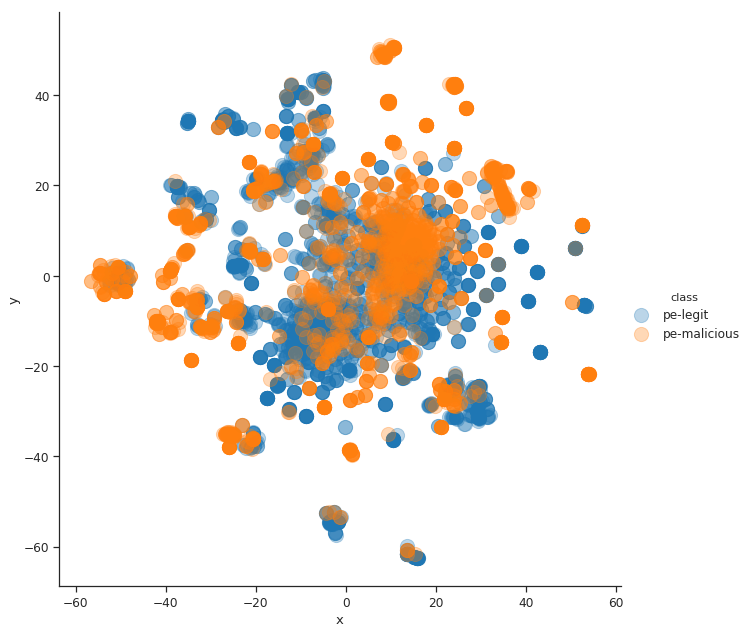

In [9]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='x',
           y='y',
           data=plot_df,
           fit_reg=False,
           legend=True,
           size=9,
           hue='class',
           scatter_kws={"s":200, "alpha":0.3})

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [11]:
model = LogisticRegression()#C=0.6,dual=True)

In [12]:
sample = data.sample(frac=1.0)
y = sample.loc[:,0].values
X = sample.loc[:,1:].values
X = Normalizer().fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = dupa = train_test_split(X,y, train_size=0.8, shuffle=False)


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
model.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
model.score(X_test, y_test)

0.848452267840176

In [16]:
sample = data.sample(frac=1.0)
y = sample.loc[:,0].values
X = sample.loc[:,1:].values

pca = PCA(n_components=10).fit_transform(X)
X = np.hstack((X, pca))
X = StandardScaler().fit_transform(X)

In [17]:
from xgboost import XGBClassifier, plot_importance

In [18]:
model = XGBClassifier(colsample_bytree=0.7, subsample=0.7, max_depth=20, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-error:0.044107	validation_0-auc:0.978356
[1]	validation_0-error:0.037181	validation_0-auc:0.987783
[2]	validation_0-error:0.03098	validation_0-auc:0.990969
[3]	validation_0-error:0.029679	validation_0-auc:0.991741
[4]	validation_0-error:0.028804	validation_0-auc:0.992387
[5]	validation_0-error:0.027704	validation_0-auc:0.99324
[6]	validation_0-error:0.026954	validation_0-auc:0.993833
[7]	validation_0-error:0.025979	validation_0-auc:0.994255
[8]	validation_0-error:0.025754	validation_0-auc:0.994327
[9]	validation_0-error:0.024979	validation_0-auc:0.994802
[10]	validation_0-error:0.024954	validation_0-auc:0.995192
[11]	validation_0-error:0.024504	validation_0-auc:0.995275
[12]	validation_0-error:0.023779	validation_0-auc:0.995595
[13]	validation_0-error:0.023153	validation_0-auc:0.995835
[14]	validation_0-error:0.022478	validation_0-auc:0.996094
[15]	validation_0-error:0.021978	validation_0-auc:0.99619
[16]	validation_0-error:0.021553	validation_0-auc:0.996254
[17]	valid

[139]	validation_0-error:0.013177	validation_0-auc:0.99822
[140]	validation_0-error:0.013152	validation_0-auc:0.998227
[141]	validation_0-error:0.013152	validation_0-auc:0.998234
[142]	validation_0-error:0.013177	validation_0-auc:0.998232
[143]	validation_0-error:0.013177	validation_0-auc:0.998235
[144]	validation_0-error:0.013152	validation_0-auc:0.998238
[145]	validation_0-error:0.013102	validation_0-auc:0.99824
[146]	validation_0-error:0.013127	validation_0-auc:0.998243
[147]	validation_0-error:0.013052	validation_0-auc:0.998244
[148]	validation_0-error:0.013077	validation_0-auc:0.998241
[149]	validation_0-error:0.013127	validation_0-auc:0.998243


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eval_metric=['error', 'auc'], gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=None, n_estimators=150, n_jobs=28,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

In [19]:
model.score(X_test, y_test)

0.9868730309546432

In [20]:
model.score(X_test, y_test)

0.9868730309546432

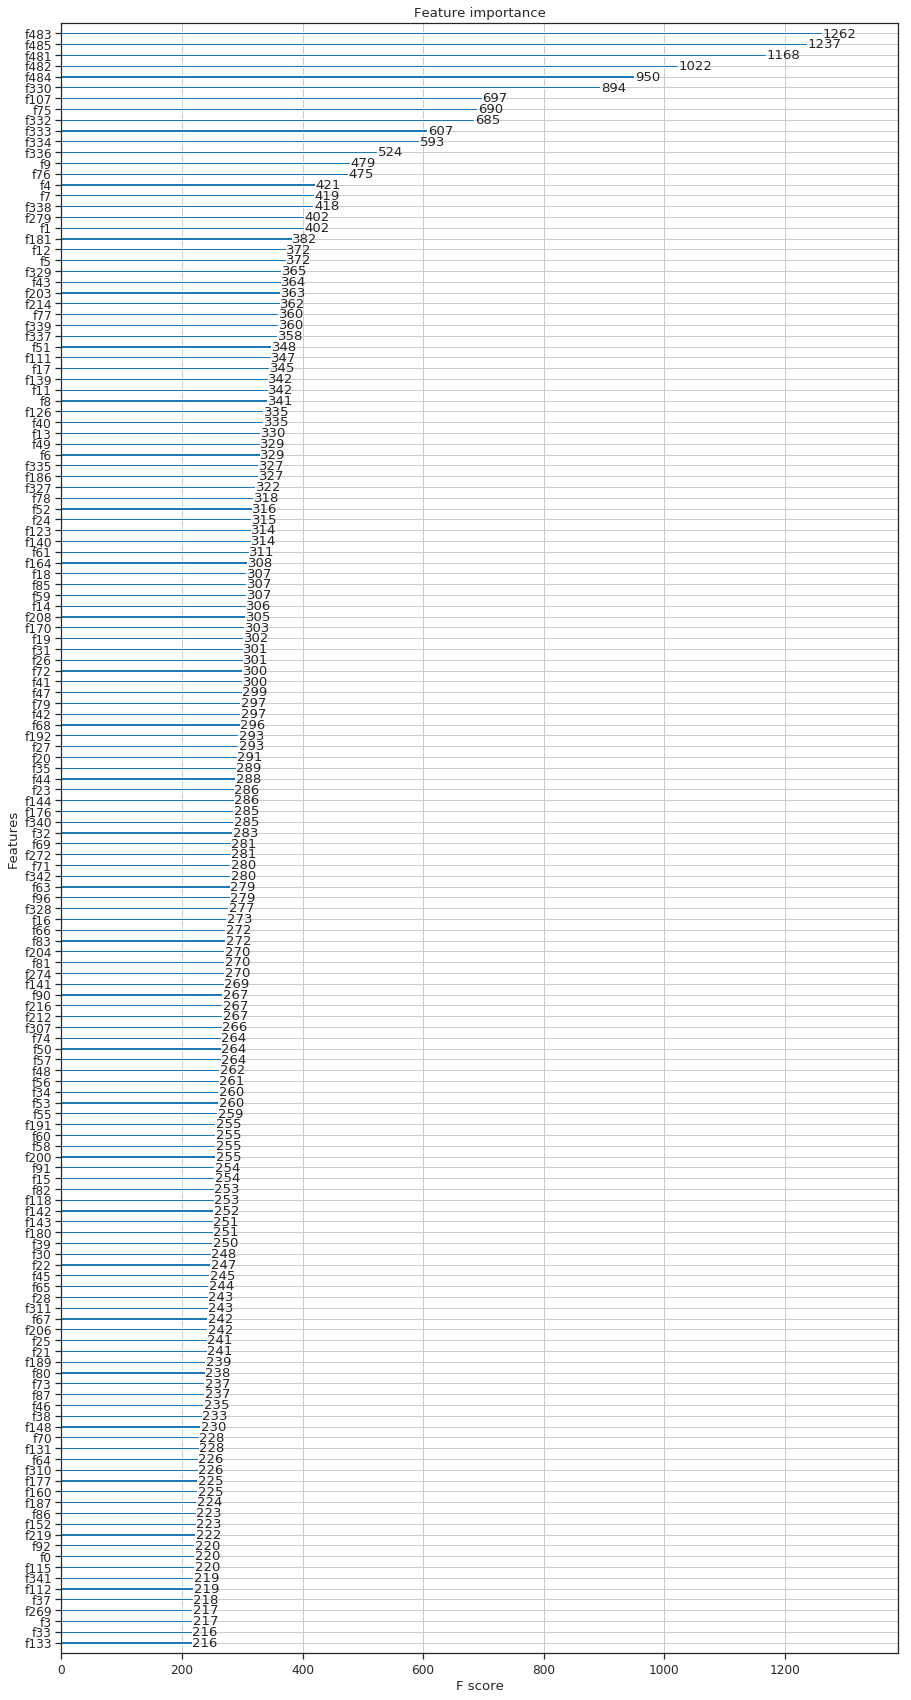

In [26]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15, 30))
plot_importance(model, ax=ax, max_num_features=150, )

In [27]:
sample = data.sample(frac=1.0)
y = sample.loc[:,0].values
X = sample.loc[:,1:].values

pca = PCA(n_components=10).fit_transform(X)
X = np.hstack((X, pca))
X = StandardScaler().fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = dupa = train_test_split(X,y, test_size=0.2, shuffle=False)

In [29]:
model = XGBClassifier(colsample_bytree=0.5, subsample=0.5, max_depth=20, n_estimators=100, n_jobs=28, eval_metric=[ "error","auc"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-error:0.050508	validation_0-auc:0.971135
[1]	validation_0-error:0.041106	validation_0-auc:0.98659
[2]	validation_0-error:0.034105	validation_0-auc:0.989307
[3]	validation_0-error:0.031055	validation_0-auc:0.991887
[4]	validation_0-error:0.028379	validation_0-auc:0.992787
[5]	validation_0-error:0.027079	validation_0-auc:0.99369
[6]	validation_0-error:0.026304	validation_0-auc:0.994264
[7]	validation_0-error:0.025579	validation_0-auc:0.994573
[8]	validation_0-error:0.025204	validation_0-auc:0.994948
[9]	validation_0-error:0.024804	validation_0-auc:0.995164
[10]	validation_0-error:0.024404	validation_0-auc:0.995489
[11]	validation_0-error:0.023379	validation_0-auc:0.99578
[12]	validation_0-error:0.022953	validation_0-auc:0.996026
[13]	validation_0-error:0.023178	validation_0-auc:0.996131
[14]	validation_0-error:0.022553	validation_0-auc:0.996369
[15]	validation_0-error:0.022403	validation_0-auc:0.996494
[16]	validation_0-error:0.021853	validation_0-auc:0.996662
[17]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, eval_metric=['error', 'auc'], gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=28,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

In [30]:
model.score(X_test, y_test)

0.9852227834175127